<a href="https://colab.research.google.com/github/gonulsinem/1_Python_ML/blob/main/5_DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Karar Ağacı - Decision Tree


BTK Akademi- Python ile Makine Öğrenmesi Kursu calismalari ve kendi tuttuğum notlardan olusmaktadir.

Kursta verilen maaslar.csv veri seti kullanildi


In [1]:
#kutuphaneler import edildi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/maaslar.csv')
data

,unvan,Egitim Seviyesi,maas
0,Cayci,1,2250
1,Sekreter,2,2500
2,Uzman Yardimcisi,3,3000
3,Uzman,4,4000
4,Proje Yoneticisi,5,5500
5,Sef,6,7500
6,Mudur,7,10000
7,Direktor,8,15000
8,C-level,9,25000
9,CEO,10,50000


In [3]:
x = data.iloc[:,1:2]
x

,Egitim Seviyesi
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [6]:
y = data.iloc[:,-1:]
y

,maas
0,2250
1,2500
2,3000
3,4000
4,5500
5,7500
6,10000
7,15000
8,25000
9,50000


In [7]:
# Lineer Regresyon

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x.values, y.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

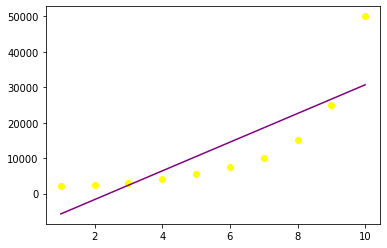

In [8]:
plt.scatter(x.values, y.values, color = 'yellow')
plt.plot(x.values, lin_reg.predict(x.values), color = 'purple')

[[1.000e+00 1.000e+00 1.000e+00 1.000e+00 1.000e+00]
 [1.000e+00 2.000e+00 4.000e+00 8.000e+00 1.600e+01]
 [1.000e+00 3.000e+00 9.000e+00 2.700e+01 8.100e+01]
 [1.000e+00 4.000e+00 1.600e+01 6.400e+01 2.560e+02]
 [1.000e+00 5.000e+00 2.500e+01 1.250e+02 6.250e+02]
 [1.000e+00 6.000e+00 3.600e+01 2.160e+02 1.296e+03]
 [1.000e+00 7.000e+00 4.900e+01 3.430e+02 2.401e+03]
 [1.000e+00 8.000e+00 6.400e+01 5.120e+02 4.096e+03]
 [1.000e+00 9.000e+00 8.100e+01 7.290e+02 6.561e+03]
 [1.000e+00 1.000e+01 1.000e+02 1.000e+03 1.000e+04]]


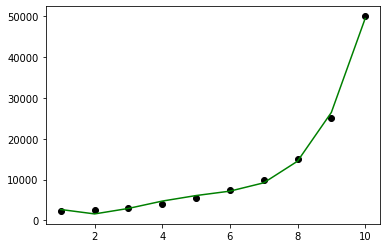

In [10]:
# Polinomal Regresyon 

from sklearn.preprocessing import PolynomialFeatures
pol_reg = PolynomialFeatures(degree = 4)
x_pol = pol_reg.fit_transform(x.values)
print(x_pol)

lin_reg2 = LinearRegression()
lin_reg2.fit(x_pol,y)

plt.scatter(x.values, y.values, color = 'black')
plt.plot(x.values, lin_reg2.predict(x_pol), color = 'green')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


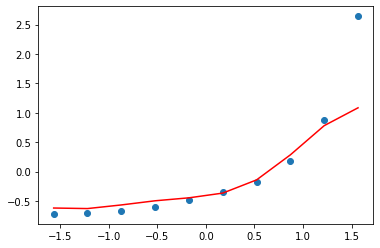

In [12]:
# SVR

from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
x_scaler = sc1.fit_transform(x.values)

sc2 = StandardScaler()
y_scaler = sc2.fit_transform(y.values)

from sklearn.svm import SVR

svr_reg = SVR(kernel = 'rbf')
svr_reg.fit(x_scaler, y_scaler)

plt.scatter(x_scaler, y_scaler)
plt.plot(x_scaler, svr_reg.predict(x_scaler), color = 'red')

## Decision Tree

<class 'numpy.ndarray'>


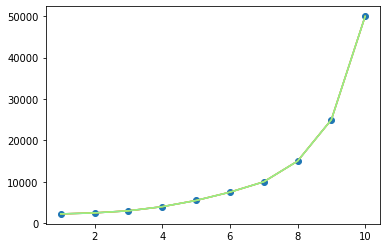

In [21]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor(random_state = 0)
dt_reg.fit(x.values, y.values)

z = x.values + 0.5 # sınıflandırma aralıgı ayni oldugu icin degerleri ayni
a = x.values - 0.4

plt.scatter(x.values, y.values)
plt.plot(x.values, dt_reg.predict(x.values), color = 'purple')
plt.plot(x.values, dt_reg.predict(z), color = 'yellow')
plt.plot(x.values, dt_reg.predict(a), color = 'lightgreen')
